In [1]:
%matplotlib inline


# Seasonal decomposition of your time-series



This example demonstrates how we can use the ``decompose`` function to extract
the trend, seasonal, and random components of the time series and then
plot them all using the ``decomposed_plot`` function. We'll be plotting both
``additive`` and ``multiplicative`` examples of seasonality. To see the R
equivalent that inspired this example go `here <https://anomaly.io/seasonal-trend-decomposition-in-r/index.html>`_.

.. raw:: html

   <br/>



Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Airpassengers Seasonal Decomposition')

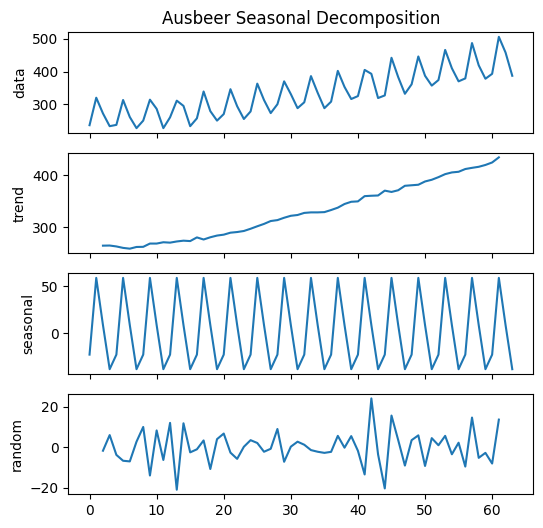

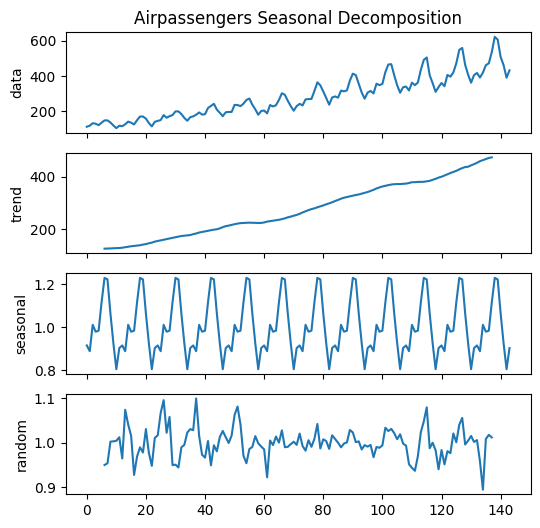

In [2]:
print(__doc__)

# Author: Charles Drotar <drotarcharles@gmail.com>

from pmdarima import arima
from pmdarima import datasets
from pmdarima import utils

# #############################################################################

# So what is happening when we call `decomposed`?
# 1) The trend is extracted from the signal via a convolution using either a
#    SMA or a user-defined filter.
# 2) We remove the effects of the trend from the original signal by either
#    subtracting its effects or dividing out its effects for `additive` or
#    'multiplicative' types of decompositions, respectively. We then take the
#    mean across all seasons to get the values for a single season. For m=4, we
#    expect 4 values for a single season.
# 3) We then create the seasonal series by replicating the single season
#    until it is the same length of the trend signal.
# 4) Lastly to get the random/noise elements of the signal we remove the effects
#    of both the trend and seasonal series and we are now left with the
#    variation of the original signal that is neither explainable by seasonal
#    nor trend effects.
#
# This logic produces a named tuple of the original signal, trend, seasonal,
# and random components. It is this named tuple that is passed to
# `decomposed_plot`

figure_kwargs = {'figsize': (6, 6)}  # set figure size for both examples

#
# ADDITIVE EXAMPLE : ausbeer
#

# Decompose the ausbeer dataset into trend, seasonal and random parts.
# We subset to a small window of the time series.

head_index = 17*4+2
tail_index = 17*4-4
first_index = head_index - tail_index
last_index = head_index
ausbeer = datasets.load_ausbeer()
timeserie_beer = ausbeer[first_index:last_index]
decomposed = arima.decompose(timeserie_beer, 'additive', m=4)

# Plot the decomposed signal of ausbeer as a subplot




#
# MULTIPLICATIVE EXAMPLE: airpassengers
#

# Decompose the airpassengers dataset into trend, seasonal and random parts.
decomposed = arima.decompose(datasets.load_airpassengers(),
                             'multiplicative', m=12)

# Plot the decomposed signal of airpassengers as a subplot

axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,
                             show=False)
axes[0].set_title("Airpassengers Seasonal Decomposition")

In [3]:
datasets.load_ausbeer()

array([284., 213., 227., 308., 262., 228., 236., 320., 272., 233., 237.,
       313., 261., 227., 250., 314., 286., 227., 260., 311., 295., 233.,
       257., 339., 279., 250., 270., 346., 294., 255., 278., 363., 313.,
       273., 300., 370., 331., 288., 306., 386., 335., 288., 308., 402.,
       353., 316., 325., 405., 393., 319., 327., 442., 383., 332., 361.,
       446., 387., 357., 374., 466., 410., 370., 379., 487., 419., 378.,
       393., 506., 458., 387., 427., 565., 465., 445., 450., 556., 500.,
       452., 435., 554., 510., 433., 453., 548., 486., 453., 457., 566.,
       515., 464., 431., 588., 503., 443., 448., 555., 513., 427., 473.,
       526., 548., 440., 469., 575., 493., 433., 480., 576., 475., 405.,
       435., 535., 453., 430., 417., 552., 464., 417., 423., 554., 459.,
       428., 429., 534., 481., 416., 440., 538., 474., 440., 447., 598.,
       467., 439., 446., 567., 485., 441., 429., 599., 464., 424., 436.,
       574., 443., 410., 420., 532., 433., 421., 41

In [6]:
head_index = 17*4+2
tail_index = 17*4-4

first_index = head_index - tail_index
last_index = head_index
ausbeer = datasets.load_ausbeer()
timeserie_beer = ausbeer[first_index:last_index]
timeserie_beer

array([236., 320., 272., 233., 237., 313., 261., 227., 250., 314., 286.,
       227., 260., 311., 295., 233., 257., 339., 279., 250., 270., 346.,
       294., 255., 278., 363., 313., 273., 300., 370., 331., 288., 306.,
       386., 335., 288., 308., 402., 353., 316., 325., 405., 393., 319.,
       327., 442., 383., 332., 361., 446., 387., 357., 374., 466., 410.,
       370., 379., 487., 419., 378., 393., 506., 458., 387.])

In [8]:
len(ausbeer)

212

In [7]:
head_index

70

In [9]:
tail_index

64

In [11]:
first_index

6

In [12]:
last_index

70